In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


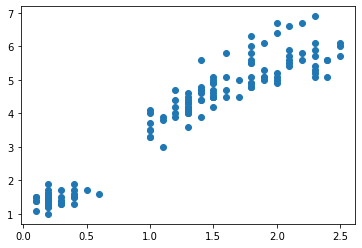

In [4]:
plt.scatter(df['petal width (cm)'],df['petal length (cm)'])

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal width (cm)', 'petal length (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
df['cluster'] = y_predicted
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [7]:
df.cluster.unique()

array([1, 0, 2])

In [8]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster ==1]
df2 = df[df.cluster ==2]

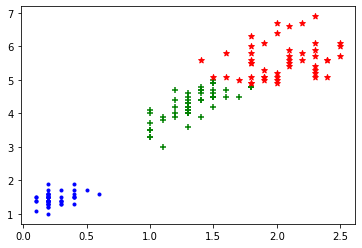

In [9]:
plt.scatter(df0['petal width (cm)'], df0['petal length (cm)'], marker = '+', color = 'green')
plt.scatter(df1['petal width (cm)'], df1['petal length (cm)'], marker='.', color='blue')
plt.scatter(df2['petal width (cm)'], df2['petal length (cm)'], marker = '*', color = 'red')

In [10]:
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal width (cm)', 'petal length (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
df['cluster'] = y_predicted

In [13]:
km.cluster_centers_

array([[0.51041667, 0.55867014],
       [0.06083333, 0.07830508],
       [0.81510417, 0.7740113 ]])

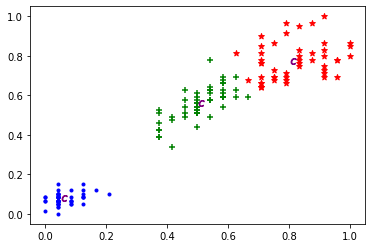

In [14]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster ==1]
df2 = df[df.cluster ==2]

plt.scatter(df0['petal width (cm)'], df0['petal length (cm)'], marker = '+', color = 'green')
plt.scatter(df1['petal width (cm)'], df1['petal length (cm)'], marker='.', color='blue')
plt.scatter(df2['petal width (cm)'], df2['petal length (cm)'], marker = '*', color = 'red')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker='$C$')

In [15]:
k_rng = range(1,10)
sse= []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal width (cm)', 'petal length (cm)']])
    sse.append(km.inertia_)

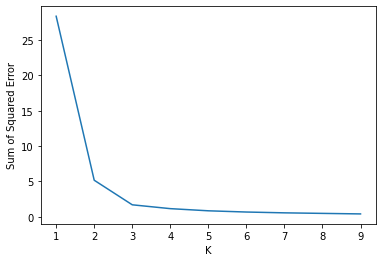

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)